# Project: Wrangling and Analyze Data

In [ ]:
import pandas as pd
import numpy as np
import requests
import os
import json as js
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [108]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [109]:
# using request library  to load data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#creating a file
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [110]:
# loading the data into a dataframe
image_prediction = pd.read_csv('image_predictions.csv', sep = '\t')

3. Gathering additional data from tweet_json.txt

In [111]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [112]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
len(tweet_ids)
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [113]:
# Read the .txt file line by line into a list of dictionaries

df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(js.loads(line))

 The code used above was provided by udacity

In [114]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Accessing data visually

In [252]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [116]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [117]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None


In [118]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [119]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [120]:
tweet_data.sample(50)

,id,retweet_count,favorite_count
1433,697259378236399616,1136,3611
1869,675147105808306176,273,1026
130,867051520902168576,8425,33420
1535,689877686181715968,1344,3323
643,793180763617361921,2310,7740
2073,670840546554966016,213,634
1238,712085617388212225,556,3531
1075,739544079319588864,24319,43694
36,885167619883638784,4556,22367
794,773308824254029826,8640,25846


In [121]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

#### twitter_archive table


1. keep only original tweets

2. incorrect datatype in some  columns(tweet_id,  timestamp)

3. Error in dog names

4. missing values in some columns

5. source column is in html format

6. invalid values in tweet_source column





### Image prediction
1. invalid data type in id column

### Tweet_data table

1. invalid data types in id column

2. rename id_str to tweet_id


### Tidiness issues
1. in Twitter_archive table, 4 different columns(doggo, floofer, pupper and puppo) are the same and should be melted into a column with value name as dog_life_cycle.

2. twitter_archive table, image_prediction table, tweet_data merged together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [253]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
tweet_clean = tweet_data.copy()


### Issue 1:

#### Define : Drop columns that are not needed for the analysis, keep only original tweet.

#### Code

In [254]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [255]:


archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                         'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [256]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue 2

#### Define :  incorrect datatype in some  columns in tweet_archive table

#### Code

In [257]:
# Convert incorrect data types to correct data type
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)



#### Test

In [258]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


In [259]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [260]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue 3

#### Define :   Drop columns from archive_clean table with missing values

### code

In [261]:
archive_clean.dropna(axis='columns', inplace=True)

### Test

In [262]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


In [263]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [264]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue 4


### Define: Error in dog names




#### code:


In [265]:
#removing invalid values
invalid_values = ['a', 'Bo', 'the']

for values in invalid_values:
    archive_clean = archive_clean[archive_clean['name'] != values]

#### Test

In [266]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue 5



####  Define: source column is in HTML format


#### code

In [267]:
#extracting the source from the HTML formated string
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

##### Test

In [268]:
archive_clean.source.value_counts()

Twitter for iPhone     2154
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

### Issue 6



####  Define: invalid values in tweet_source column


#### code

In [269]:
#  removing invalid entries
archive_clean = archive_clean[archive_clean['source'] != 'Vine - Make a Scene' ]

### Test

In [270]:
archive_clean.source.value_counts()


Twitter for iPhone    2154
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Issue 7



####  Define: incorrect data type in Id column in image_clean table


#### code

In [271]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)


#### Test

In [272]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue 8



####  Define: incorrect data type in Id column in tweet_clean table


#### code

In [273]:
tweet_clean.id = tweet_clean.id.astype(str)

#### Test

In [274]:
tweet_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

### Issue 9



####  Define:  rename **id_str**  to **tweet_id**  in the  tweet_clean table.


#### code

In [275]:
tweet_clean.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

##### Test

In [276]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


# Tidiness issues

### Issue 1



####  Define:  in Twitter_archive table, 4 different columns(doggo, floofer, pupper and puppo) are the same and should be melted into one column and value to be dog_life_cycle.




#### code

In [278]:
#melting doggo, floofer, pupper and puppo
archive_clean = archive_clean.melt(id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator','rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name ='dog_life_cycle')

In [280]:

archive_clean = archive_clean.drop(['variable'], axis = 1)

In [282]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_life_cycle
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [283]:
archive_clean.dog_life_cycle.value_counts()

None       8419
pupper      232
doggo        88
puppo        29
floofer       8
Name: dog_life_cycle, dtype: int64

#### Issue 2

#### Define:  Merge archive_clean with the two other tables.


### code

In [284]:
first_merge = pd.merge(left=archive_clean, right=tweet_clean, how='left', on='tweet_id')
final_merge = pd.merge(left= first_merge, right=image_clean, how='left', on='tweet_id')

#### Test

In [285]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8776 entries, 0 to 8775
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8776 non-null   object             
 1   timestamp           8776 non-null   datetime64[ns, UTC]
 2   source              8776 non-null   object             
 3   text                8776 non-null   object             
 4   rating_numerator    8776 non-null   int64              
 5   rating_denominator  8776 non-null   int64              
 6   name                8776 non-null   object             
 7   dog_life_cycle      8776 non-null   object             
 8   retweet_count       8768 non-null   float64            
 9   favorite_count      8768 non-null   float64            
 10  jpg_url             8020 non-null   object             
 11  img_num             8020 non-null   float64            
 12  p1                  8020 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [286]:
final_merge.to_csv('twitter_archive_master.csv', index=False)

In [287]:
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [288]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_life_cycle', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Insight 1: finding Top 10 most popular dog by name.


##### code

In [289]:
#Counting the first 10 dog
df_1 = df.copy()
popular_dog = df_1.name.value_counts()[1:11]

In [290]:
popular_dog

Charlie    48
Cooper     44
Oliver     44
Penny      40
Tucker     40
Lucy       40
Winston    36
Lola       36
Sadie      32
an         28
Name: name, dtype: int64

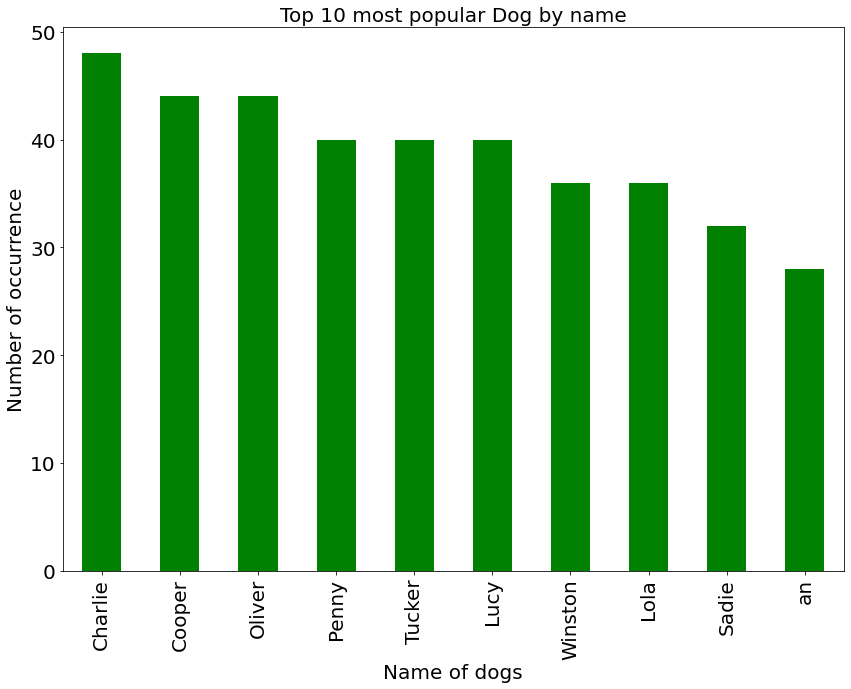

In [291]:
#plottig a bar chart showing most popular dog by name
Pdog_bar = popular_dog.plot.bar(color = 'green', fontsize = 20);

#bar size(width, height)
Pdog_bar.figure.set_size_inches(14, 10)

#Adding labels
plt.title('Top 10 most popular Dog by name', color = 'black', fontsize = '20')
plt.xlabel('Name of dogs', fontsize = '20')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '20');

#####  The most popular dog is charlie

### Insight 2:  Correlation between retweet_count and Favorite_count



### code

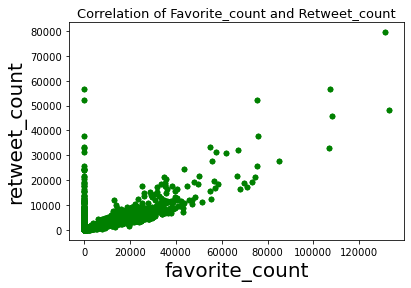

In [293]:
# a scatter plot showing Correlation between retweet_count and Favorite_count
df.plot.scatter(x='favorite_count', y='retweet_count', color = 'green',  fontsize = 10)

plt.title('Correlation of Favorite_count and Retweet_count',  fontsize = '13')
plt.xlabel('favorite_count', color = 'black', fontsize = '20')
plt.ylabel('retweet_count', color = 'black', fontsize = '20');

##### The graph shows that there is a positive correlation 

#### Insight 3: Which twitter Source is most used ??

### code

In [294]:
# removing invalid entry
tweet_source = df[df['source'] != 'Vine - Make a Scene' ]

tweet_source = tweet_source.source.value_counts()

tweet_source

Twitter for iPhone    8616
Twitter Web Client     120
TweetDeck               40
Name: source, dtype: int64

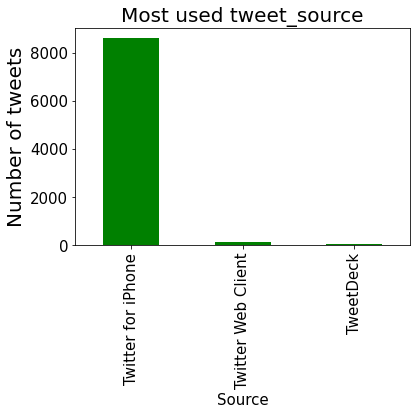

In [295]:
#plotting a bar chart  of tweet_source

source_bar =  tweet_source.plot.bar(color = 'green', fontsize = 15)

#bar size(width, height)
Pdog_bar.figure.set_size_inches(14, 10)

#Adding labels
plt.title('Most used tweet_source',  fontsize = '20')
plt.xlabel('Source',  fontsize = '15')
plt.ylabel('Number of tweets',  fontsize = '20');

#### The analysis above indicates that Twitter for Iphone is the most popular tweet source.